In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

## Training Data load and description

RLWM_train_data.csv: RLWM training phase data. Each row represents a trial from a block of a participant. 

id: de-identfied subject ID  
block: block number (0 for practice block, excluded from analyses)  
trial: trial number in block  
stimulus: stimulus presented for this trial (1:x, x = set size)  
rt: response time in milliseconds  
key_press: action for the trial (0 = J, 1 = K, 2 = L)  
key_answer: correct action for the trial (0 = J, 1 = K, 2 = L)  
correct: whether response was corect  
set_size: set size of this block  
set: image folder used for this block  
img_num: image file used for this trial's stimulus  
iteration: how many times this stimulus has been seen so far  
delay: how many trials since last presentation of this stimulus  
reward_history: how many correct responses for this stimulus since block start  



In [4]:
df = pd.read_csv('impulsivity_rlwm/RLWM_train_data.csv')

In [5]:
df

,id,block,trial,stimulus,rt,key_press,key_answer,correct,set_size,set,img_num,iteration,delay,reward_history
0,1,0,1,1,485.795,0,0,1,2,0,1,1,0,1
1,1,0,2,2,382.265,1,1,1,2,0,2,1,0,1
2,1,0,3,2,496.300,0,1,0,2,0,2,2,1,1
3,1,0,4,1,592.515,0,0,1,2,0,1,2,3,2
4,1,0,5,1,501.220,0,0,1,2,0,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58495,90,12,74,1,603.980,0,0,1,6,1,3,13,4,11
58496,90,12,75,6,470.560,2,2,1,6,1,2,13,7,11
58497,90,12,76,3,580.190,1,1,1,6,1,4,13,3,11
58498,90,12,77,2,297.975,1,1,1,6,1,6,13,11,12


In [19]:
subj = df['id'].to_numpy()
block = df['block'].to_numpy()
trial = df['trial'].to_numpy()
rt = df['rt'].to_numpy()
key_answer = df['key_answer'].to_numpy()
correct = df ['correct'].to_numpy()
set_size = df['set_size'].to_numpy()
img_num = df['img_num'].to_numpy()
iteration = df['iteration'].to_numpy()
delay = df['delay'].to_numpy()
reward_history = df['reward_history'].to_numpy()


In [33]:
bad_trials = np.where(block==0)[0]
more_bad = np.where(np.nan_to_num(rt)<=200)[0]
bad_idx = np.append(bad_trials, more_bad)
print(f'{(bad_idx.shape[0]/subj.shape[0])*100:.2f} percent trials removed')

10.21 percent trials removed


In [41]:
clean_setsize = np.array([i for j, i in enumerate(set_size) if j not in bad_idx])
clean_correct = np.array([i for j, i in enumerate(correct) if j not in bad_idx])
clean_iterations = np.array([i for j, i in enumerate(iteration) if j not in bad_idx])


In [74]:
all_set = {}
sem_set = {}
for s in range(2, 7):
    all_iter = []
    sem_iter = []
    for n in range(1, 15):
        just_set = np.where(clean_setsize==s)[0]
        just_iter = np.where(clean_iterations==n)[0]
        test_result = np.array([i for j, i in enumerate(clean_correct) if j in just_set and  j in just_iter])
        all_iter.append(np.mean(test_result))
        sem_iter.append(scipy.stats.sem(test_result))
    all_set[s] = all_iter
    sem_set[s] = sem_iter

/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


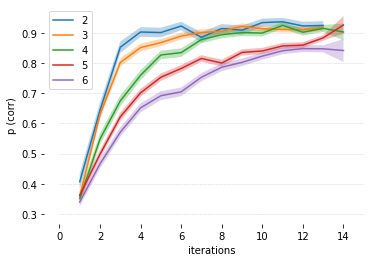

In [81]:
plt.figure()
ax = plt.subplot(111)

for i in range(2, 7):
    plt.plot(list(range(1, 15)), all_set[i], label=str(i))
    plt.fill_between(list(range(1, 15)), [i-j for i, j in zip(all_set[i], sem_set[i])], [i+j for i, j in zip(all_set[i], sem_set[i])], alpha=0.3)

for y in range(30, 100, 10):
     plt.plot([0, 8, 14, 15], [y/100]*4, '--', lw=0.5, color='dimgray', alpha=0.3)

plt.legend()
plt.xlabel('iterations')
plt.ylabel('p (corr)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False) 

In [56]:
plt.fill_between(allrange, [np.mean(mlrangeh10r_abs[str(item)]) - scipy.stats.sem(mlrangeh10r_abs[str(item)]) for item in allrange], [np.mean(mlrangeh10r_abs[str(item)]) + scipy.stats.sem(mlrangeh10r_abs[str(item)]) for item in allrange], alpha=0.3, color='red')



(346,)

In [78]:
[i-j for i, j in zip(all_set[2], sem_set[2])]

[0.37962749123717415,
 0.6177940402646009,
 0.8337055987255727,
 0.8875193444317072,
 0.8857078837150225,
 0.9090909090909092,
 0.8686836803803617,
 0.9001508435065485,
 0.8943424895142223,
 0.9214684576648206,
 0.9243660205117925,
 0.9093468324375671,
 0.9111726895827699,
 nan]